In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import plotly.express as px
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score

In [4]:
df = pd.read_csv('./Country-data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    title='Coutries by gdpp'
                   )
fig.show()

In [9]:
df_no_labels = df.drop(['country'], axis=1)
scaler = StandardScaler()
scaler.fit(df_no_labels)
X = scaler.transform(df_no_labels)


/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/si

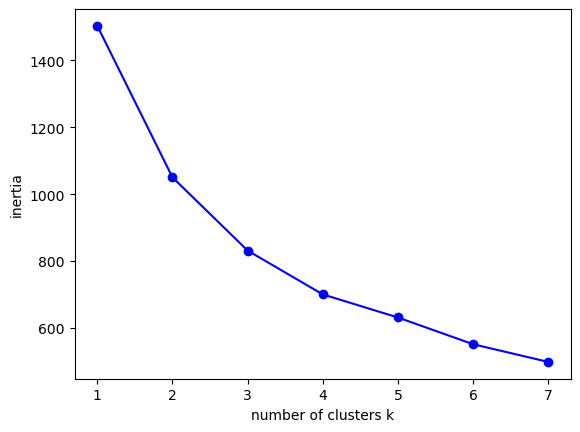

In [10]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,8), inertia, 'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.show()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/si

2 clusters has score: 0.287356689214067
3 clusters has score: 0.28329575683463126
4 clusters has score: 0.30210825058992513
5 clusters has score: 0.22327899566511256
6 clusters has score: 0.23057357437984735
7 clusters has score: 0.25179867083491136


/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



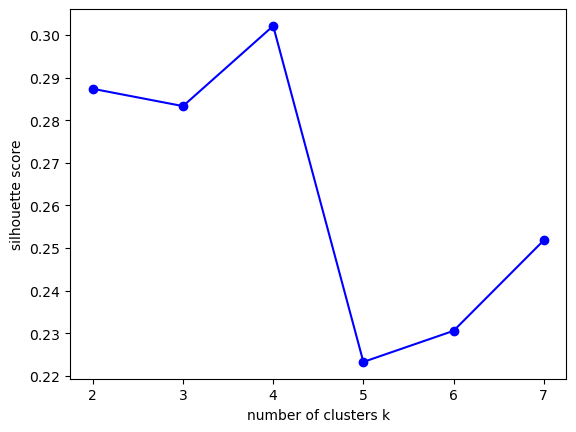

In [11]:
silhoue = []
for k in range(2,8):
    model = KMeans(n_clusters=k, random_state=0).fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean')
    print(k, "clusters has score:", score)
    silhoue.append(score)
#There seems to be a peak at k=4
plt.plot(range(2,8), silhoue, 'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('silhouette score')
plt.show()


    

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



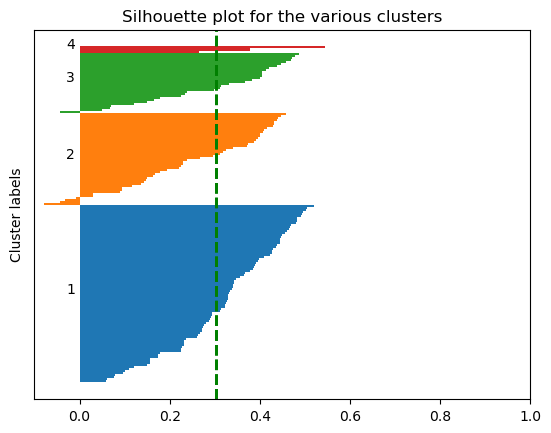

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_predict = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
silhouette_vals = silhouette_samples(X,y_predict)

y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
   cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
   cluster_silhouette_vals.sort()
   y_upper += len(cluster_silhouette_vals)
   
   plt.barh(range(y_lower,y_upper),
   cluster_silhouette_vals,height =1);
   plt.text(-0.03,(y_lower+y_upper)/2,str(i+1))
   y_lower += len(cluster_silhouette_vals)
       
   # Get the average silhouette score 
   avg_score = np.mean(silhouette_vals)
   plt.axvline(avg_score,linestyle ='--',
   linewidth =2,color = 'green')
   plt.yticks([])
   plt.xlim([-0.1, 1])
   #plt.set_xlabel('Silhouette coefficient values')
   plt.ylabel('Cluster labels')
   plt.title('Silhouette plot for the various clusters');

In [13]:
model1 = KMeans(n_clusters=4, random_state=0).fit(X)
country = df.iloc[:,0]
clusters = model1.predict(X)
map = pd.DataFrame({'clusters':clusters,'country':country})
map.head()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,clusters,country
0,1,Afghanistan
1,0,Albania
2,0,Algeria
3,1,Angola
4,0,Antigua and Barbuda


In [14]:
fig = px.choropleth(map,
                    locationmode='country names',
                    locations='country',
                    color='clusters',
                    title='Coutries by labels'
                   )
fig.show()